<a href="https://colab.research.google.com/github/Ayisha-Parveen/Hamoye_Assignments/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/garg1709/Hamoye-Data-Science-Internship/main/ML%20Regression%20Predicting%20Energy%20Efficieny%20of%20Buildings/energydata_complete.csv'
df = pd.read_csv(url, sep=',')

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
df.shape

(19735, 29)

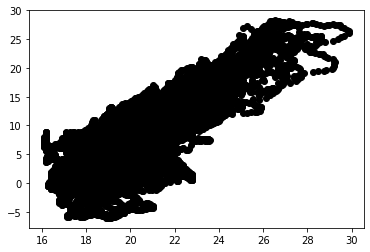

In [30]:
# Question 12:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
T2 = df['T2'].values.reshape(-1,1)
T6 = df['T6'].values.reshape(-1,1)
linearRegression.fit(T2,T6)
pred = linearRegression.predict(T2)
plt.scatter(T2, T6, color="black")


In [32]:
from sklearn.metrics import r2_score
round(r2_score(T6,pred),2)


0.64

In [39]:
# Question 13: 
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
df1 = df.drop(['date','lights'], axis=1)
columns = df.drop(['date','lights'], axis=1).columns
df2 = pd.DataFrame(minMaxScaler.fit_transform(df1),columns = columns)
Input = df2.drop(['Appliances'], axis=1)
Output = df2[['Appliances']]

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Input, Output,test_size=0.3, random_state=42)
linearRegression.fit(x_train,y_train)
pred1 = linearRegression.predict(x_test)

In [49]:
from sklearn.metrics import mean_absolute_error
round(mean_absolute_error(y_test,pred1),2)

0.05

In [50]:
# Question 14:
round(np.sum(np.square(pred1 - y_test)),2)

Appliances    45.35
dtype: float64

In [51]:
# Question 15: 

import math
from sklearn.metrics import mean_squared_error
round(math.sqrt(mean_squared_error(y_test,pred1)),3)

0.088

In [52]:
# Question 16:

from sklearn.metrics import r2_score
round(r2_score(y_test,pred1),2)

0.15

In [55]:
coef = pd.DataFrame(linearRegression.coef_, columns = x_train.columns)
coef

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.003281,0.553547,-0.236178,-0.456698,0.290627,0.096048,0.028981,0.026386,-0.015657,0.016006,...,-0.189941,-0.0398,-0.32186,0.006839,-0.077671,0.029183,0.012307,0.117758,0.00077,0.00077


In [56]:
# Question 17:

coef.sort_values(by=0, ascending=False, axis=1)

,RH_1,T3,T6,Tdewpoint,T8,RH_3,RH_6,Windspeed,T4,RH_4,...,T1,T5,RH_9,RH_7,RH_out,RH_8,T9,T2,T_out,RH_2
0,0.553547,0.290627,0.236425,0.117758,0.101995,0.096048,0.038049,0.029183,0.028981,0.026386,...,-0.003281,-0.015657,-0.0398,-0.044614,-0.077671,-0.157595,-0.189941,-0.236178,-0.32186,-0.456698


In [59]:
# Question 18:

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.4)
ridge.fit(x_train, y_train)
pred2 = ridge.predict(x_test)
round(math.sqrt(mean_squared_error(y_test,pred2)),3)

0.088

In [60]:
# Question 19:

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(x_train, y_train)
lasso.coef_

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

In [62]:
pred3 = lasso.predict(x_test)
pred3

array([0.07370267, 0.08143458, 0.07716072, ..., 0.07792848, 0.09034412,
       0.08359255])

In [63]:
# Quesstion 20

round(math.sqrt(mean_squared_error(y_test,pred3)),3)

0.094